# Detecting Outliers Using Z-scores

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
customers_data_com = pd.read_csv("datasets/combined_customers_data")

customers_data_com.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


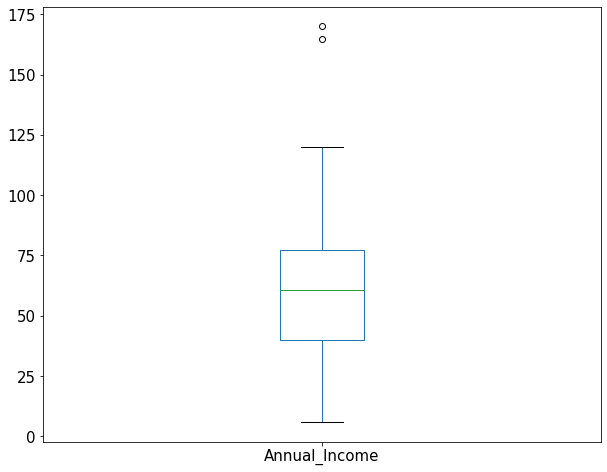

In [3]:
customers_data_com[['Annual_Income']].boxplot(figsize=(10,8),
                                             fontsize=15,
                                             grid=False);

In [4]:
customers_data_com.loc[customers_data_com['Annual_Income'] > 125]

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
198,199,Male,32,170,70
199,200,Male,30,165,73


In [5]:
# Convert all annual incomes to Z-scores

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_annual_income = scaler.fit_transform(customers_data_com['Annual_Income'].values.reshape(-1, 1))

In [6]:
scaled_annual_income.shape

(200, 1)

In [7]:
customers_data_com['Scaled_Annual_Income'] = scaled_annual_income

In [8]:
# Scaling will have the
# mean close to 0 and
# the standard deviation close to 1

customers_data_com['Scaled_Annual_Income'].describe()

count    2.000000e+02
mean     2.620126e-16
std      1.002509e+00
min     -1.944947e+00
25%     -7.161410e-01
50%      2.475683e-02
75%      6.301246e-01
max      3.982236e+00
Name: Scaled_Annual_Income, dtype: float64

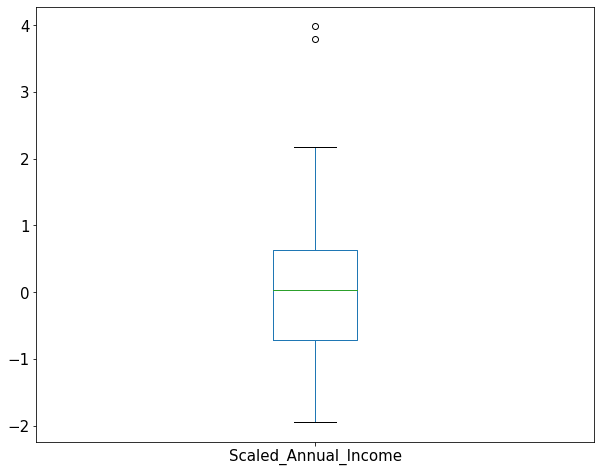

In [9]:
customers_data_com.boxplot(figsize=(10,8), fontsize=15,
                           grid=False, column=['Scaled_Annual_Income']);

In [10]:
# What is an outlier will vary
# but typically a S.D > 3

outliers = np.where(customers_data_com['Scaled_Annual_Income'] > 3)

outliers

(array([198, 199], dtype=int64),)

In [11]:
customers_data_com.iloc[outliers]

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100),Scaled_Annual_Income
198,199,Male,32,170,70,3.982236
199,200,Male,30,165,73,3.801529


In [12]:
# This time, we'll remove the outliers

customers_data_outliers_removed = customers_data_com.drop(customers_data_com.index[outliers])

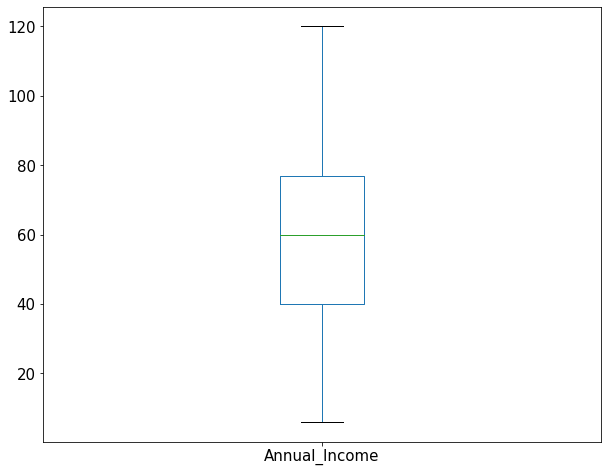

In [14]:
customers_data_outliers_removed.boxplot(figsize=(10,8), grid=False,
                                       fontsize=15, column=['Annual_Income']);